In [3]:
# libraries
import numpy
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
from lightfm import LightFM
import tqdm

# Exploratory Data Analysis (EDA)

### train dataset

In [39]:
# load train dataset
train = pd.read_csv('./data/train.csv')
print(f'train shape: {train.shape}')
train.head(3)

train shape: (3657763, 7)


,customer_id,account_id,device_type,asset_id,tunein,tuneout,resume
0,0,90627,STATIONARY,18332.0,2021-02-18 22:52:00.0,2021-02-18 23:35:00.0,0
1,0,90627,STATIONARY,24727.0,2021-03-24 23:17:00.0,2021-03-25 00:01:00.0,0
2,1,3387,STB,895.0,2021-03-15 10:05:00.0,2021-03-15 10:23:00.0,0


In [34]:
# checking dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657801 entries, 0 to 3657800
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   customer_id  int64  
 1   account_id   int64  
 2   device_type  object 
 3   asset_id     float64
 4   tunein       object 
 5   tuneout      object 
 6   resume       int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 195.3+ MB


In [35]:
# checking missing values
train.isna().mean()

customer_id    0.000000
account_id     0.000000
device_type    0.000008
asset_id       0.000006
tunein         0.000000
tuneout        0.000000
resume         0.000000
dtype: float64

In [36]:
# checking and removing of duplicates
print(f'Number of rows before drop duplicates: {len(train)}')
train = train.drop_duplicates(keep='first')
print(f'Number of rows after drop duplicates: {len(train)}')

Number of rows before drop duplicates: 3657801
Number of rows after drop duplicates: 3657763


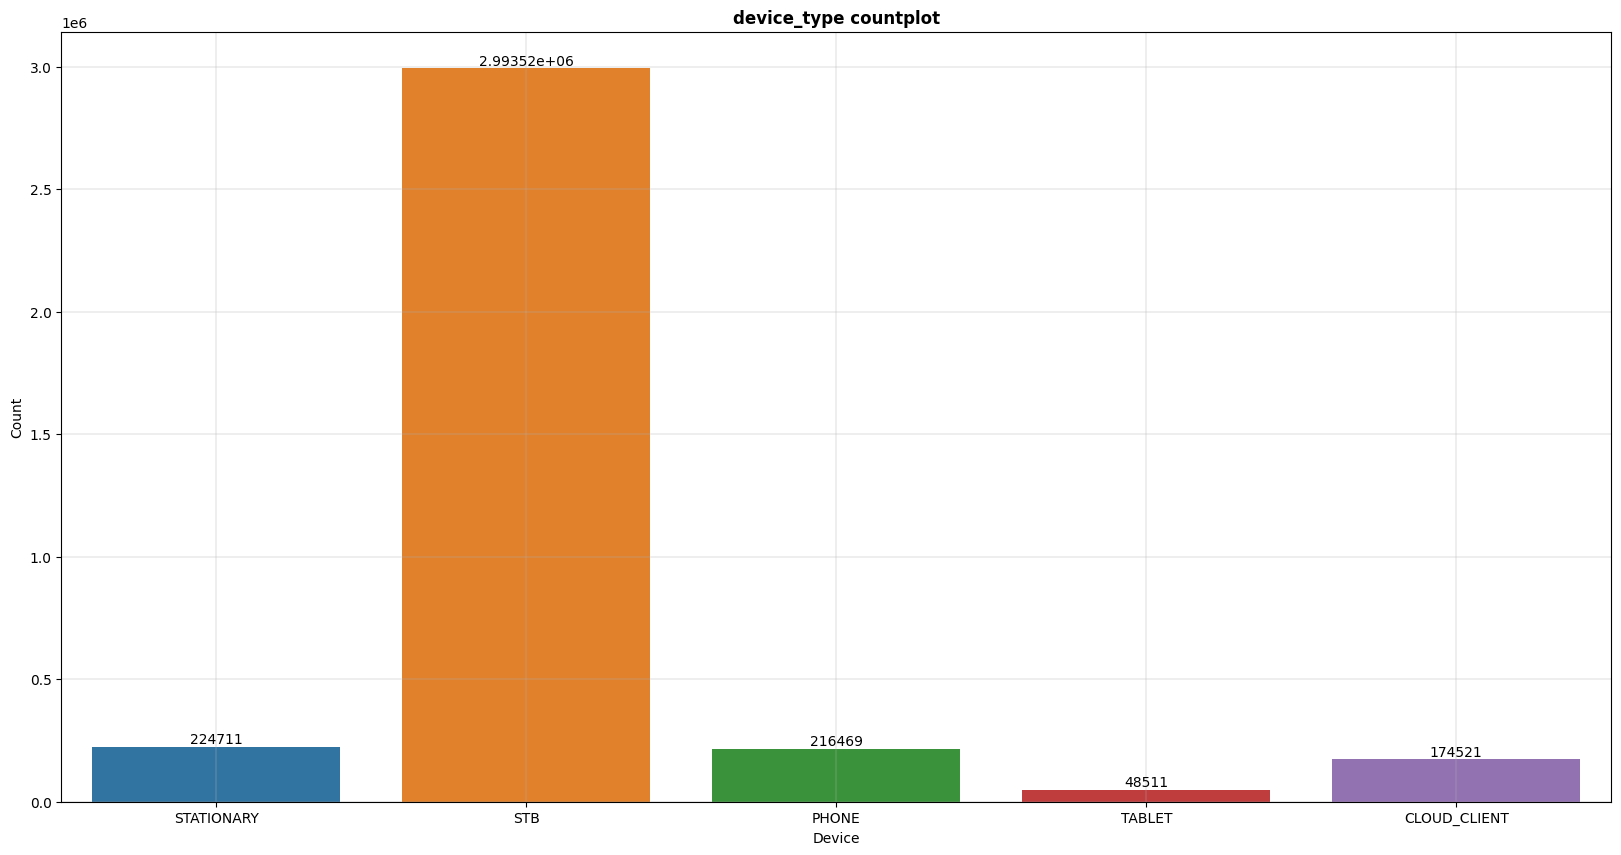

In [37]:
# ploting device_type
plt.figure(figsize=(20, 10))
ax = sns.countplot(data=train, x='device_type')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Device')
plt.ylabel('Count')
plt.grid(linewidth=0.3)
plt.title('device_type countplot', fontdict={'fontsize': 12,'fontweight':'bold'})
plt.show()

In [38]:
# customers, accounts and movies
print(f'Number of unique customers: {train["customer_id"].nunique()}')
print(f'Number of unique accounts: {train["account_id"].nunique()}')
print(f'Number of unique movies: {train["asset_id"].nunique()}')

Number of unique customers: 112340
Number of unique accounts: 113881
Number of unique movies: 23987


In [ ]:
train['']

### metadata dataset

In [43]:
# load metadata dataset
metadata = pd.read_csv('./data/metadata.csv', sep=';')
print(f'metadata shape: {metadata.shape}')
metadata.head(3)

metadata shape: (33144, 30)


,asset_id,content_id,title,reduced_title,episode_title,show_type,released_year,country_of_origin,category,keywords,...,language_rating,dialog_rating,fv_rating,pay_per_view,pack_premium_1,pack_premium_2,create_date,modify_date,start_vod_date,end_vod_date
0,15188,0.0,Ep:17 Tiempos Compulsivos,Tiempos_Compul_E17,Episodio 17,Serie,2012.0,AR,Drama,"Trastornos,Médicos,Tragicómica,Telenovela,Enfe...",...,N,N,N,N,N,N,2017-12-01T10:18:15.0Z,2019-01-26T06:37:18.0Z,2017-12-01T00:00:00.0Z,2020-12-01T23:59:59.0Z
1,24940,1.0,7 Cajas,7_Cajas,NaN,Película,2012.0,PY,Suspenso/Acción,"Latinoamérica,Pobreza,Crimen,Pandillas",...,N,N,N,Y,N,N,2017-12-19T20:58:15.0Z,2019-09-17T19:02:03.0Z,2017-12-15T00:00:00.0Z,2022-12-14T23:59:59.0Z
2,21939,2.0,La Maldición de las Hormigas Gigantes,La_Maldicion_de_las,NaN,Película,2016.0,FI,Terror/Comedia,"Criaturas,Plagas,Adolescentes,Fantasía,Video J...",...,N,N,N,N,N,N,2018-02-16T13:51:07.0Z,2020-04-28T14:16:38.0Z,2018-01-25T00:00:00.0Z,2020-12-01T23:59:59.0Z
